In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()

train_images = tf.reshape(train_images, [60000, 28 * 28])
train_images = tf.cast(train_images, "float32") / 255

test_images = train_images[:10000]
train_images = train_images[10000:]

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(name="mnist_2_model")

model.add(keras.Input(shape=(784,)))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(784))

model.summary()

model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["mse"])

Model: "mnist_2_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 784)               402192    
                                                                 
Total params: 1,066,768
Trainable params: 1,066,768
Non-trainable params: 0
_________________________________________________________________


In [4]:
callback_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=2
    ),

    keras.callbacks.ModelCheckpoint(
        filepath="model1.keras",
        monitor="val_loss"
    ),

    keras.callbacks.TensorBoard(
        log_dir="."
    )
]

In [5]:
history = model.fit(
    train_images, train_images,
    epochs=50,
    callbacks=callback_list,
    batch_size=128,
    validation_split=0.2)

Epoch 1/50
313/313 [==============================] - 3s 9ms/step - loss: 0.0509 - mse: 0.0509 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 2/50
313/313 [==============================] - 2s 8ms/step - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 3/50
313/313 [==============================] - 2s 8ms/step - loss: 0.0305 - mse: 0.0305 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 4/50
313/313 [==============================] - 2s 8ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 5/50
313/313 [==============================] - 2s 8ms/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 6/50
313/313 [==============================] - 2s 8ms/step - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 7/50
313/313 [==============================] - 2s 8ms/step - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 8/50
313/313 [==============================] - 2s 8ms/step - loss: 0.

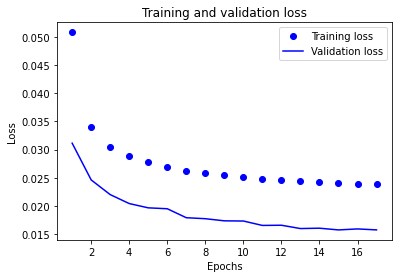

In [6]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [7]:
predictions = model.predict(test_images, batch_size=128)

79/79 [==============================] - 0s 2ms/step


In [8]:
predictions.shape

(10000, 784)

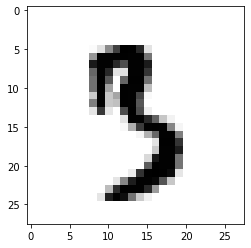

In [9]:
import matplotlib.pyplot as plt

digit = tf.reshape(test_images[1378], [28,28])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
# plt.savefig('plain_test_images_1378.png', bbox_inches='tight')

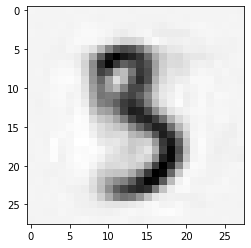

In [10]:
digit = tf.reshape(predictions[1378], [28,28])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
# plt.savefig('plain_predictions_1378.png', bbox_inches='tight')